In [1]:
!pip install scikit-learn

In [33]:
import pandas as pd
import csv
import re

# Load the dataset with the correct parameters for handling potential parsing issues
emails_df = pd.read_csv('emails.csv', quoting=csv.QUOTE_NONE, on_bad_lines='skip', escapechar="\\")

# Removing quotes from column names if they exist
emails_df.columns = emails_df.columns.str.replace('"', '')

# Handling Missing Values
emails_df.fillna('', inplace=True)

# Text Preprocessing Function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove email headers or unnecessary metadata (for demonstration, might need customization)
    text = re.sub(r'^[a-z]+:.*$', '', text)  # Remove lines that start with metadata-like patterns
    text = re.sub(r'\s+', ' ', text)  # Replace multiple whitespace with single space
    # Remove special characters (customize based on the dataset and needs)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text.strip()

# Apply text preprocessing to the 'message' column
emails_df['message'] = emails_df['message'].apply(preprocess_text)

# Display the first few rows of the cleaned dataframe
emails_df.head(15)


,file,message
0,"""allen-p/_sent_mail/1.""",messageid 187829811075855378110javamailevansthyme
1,Date: Mon,14 may 2001 163900 0700 pdt
2,From: phillip.allen@enron.com,
3,To: tim.belden@enron.com,
4,Subject:,
5,Mime-Version: 1.0,
6,Content-Type: text/plain; charset=us-ascii,
7,Content-Transfer-Encoding: 7bit,
8,X-From: Phillip K Allen,
9,X-To: Tim Belden <Tim Belden/Enron@EnronXGate>,


In [3]:
import pandas as pd

# Mock example of a structured dataframe
data = {
    'body': ['This is the first email content.', 'Here is another email, potentially suspicious.', 'This email is safe and informative.']
}
emails_structured_df = pd.DataFrame(data)

# Assuming the vectorization function from the previous message, apply it here:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_texts(texts):
    vectorizer = TfidfVectorizer(
        lowercase=True,
        stop_words='english',
        max_features=10000,
        min_df=1,
        max_df=0.9
    )
    X = vectorizer.fit_transform(texts)
    return X, vectorizer

# Apply vectorization to the 'body' column of emails_structured_df
texts = emails_structured_df['body'].tolist()
X, vectorizer = vectorize_texts(texts)

print("Vectorization Complete. Shape of X:", X.shape)


Vectorization Complete. Shape of X: (3, 5)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB

def evaluate_model(X, y):
    """
    Splits the data into training and testing sets, trains a model, and evaluates its performance.
    
    Parameters:
    X (sparse matrix): The feature matrix obtained from vectorizing the text data.
    y (array-like): The target labels indicating the class of each document.
    
    Returns:
    A dictionary containing the model's performance metrics: accuracy, precision, recall, and F1 score.
    """
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize and train the model
    model = MultinomialNB()
    model.fit(X_train, y_train)
    
    # Make predictions on the testing set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted')
    }
    
    return metrics

# Example usage
# Assume y is your array of labels for the dataset, with 1 indicating suspicious and 0 indicating not suspicious
# y = [1, 0, 1, ...]  # This should be the actual labels for your dataset
# metrics = evaluate_model(X, y)
# print(metrics)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(input_dim):
    # Create a Sequential model
    model = Sequential()
    # Add layers to the model
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # Use 'sigmoid' for binary classification
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'Precision', 'Recall'])
    return model


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Mock data for demonstration purposes
# Replace these with your actual vectorized data (X) and labels (y)
X = np.random.rand(100, 20)  # Example feature matrix with 100 samples and 20 features
y = np.random.randint(2, size=100)  # Example binary labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
                  metrics=['accuracy', 'Precision', 'Recall'])
    return model


In [8]:
# Now that X_train is defined, we can proceed to use it
input_dim = X_train.shape[1]  # Number of features from the vectorized data
model = create_model(input_dim)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))




Epoch 1/100


3/3 [==============================] - 2s 323ms/step - loss: 0.7041 - accuracy: 0.4375 - precision: 0.4487 - recall: 0.9459 - val_loss: 0.7005 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.8000
Epoch 2/100
3/3 [==============================] - 0s 33ms/step - loss: 0.6822 - accuracy: 0.6125 - precision: 0.5625 - recall: 0.7297 - val_loss: 0.7075 - val_accuracy: 0.3000 - val_precision: 0.2500 - val_recall: 0.2000
Epoch 3/100
3/3 [==============================] - 0s 30ms/step - loss: 0.6657 - accuracy: 0.6875 - precision: 0.8000 - recall: 0.4324 - val_loss: 0.7161 - val_accuracy: 0.3500 - val_precision: 0.2857 - val_recall: 0.2000
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 0.6563 - accuracy: 0.6625 - precision: 0.9167 - recall: 0.2973 - val_loss: 0.7225 - val_accuracy: 0.4000 - val_precision: 0.3333 - val_recall: 0.2000
Epoch 5/100
3/3 [==============================] - 0s 36ms/step - loss: 0.6481 - accuracy: 0.6125 - precisi

3/3 [==============================] - 0s 26ms/step - loss: 0.3656 - accuracy: 0.8500 - precision: 0.8571 - recall: 0.8108 - val_loss: 1.0157 - val_accuracy: 0.4000 - val_precision: 0.4286 - val_recall: 0.6000
Epoch 35/100
3/3 [==============================] - 0s 20ms/step - loss: 0.3558 - accuracy: 0.8375 - precision: 0.8333 - recall: 0.8108 - val_loss: 1.0072 - val_accuracy: 0.4000 - val_precision: 0.4286 - val_recall: 0.6000
Epoch 36/100
3/3 [==============================] - 0s 24ms/step - loss: 0.3486 - accuracy: 0.8625 - precision: 0.8824 - recall: 0.8108 - val_loss: 1.0034 - val_accuracy: 0.4000 - val_precision: 0.4167 - val_recall: 0.5000
Epoch 37/100
3/3 [==============================] - 0s 32ms/step - loss: 0.3500 - accuracy: 0.8875 - precision: 0.9375 - recall: 0.8108 - val_loss: 1.0197 - val_accuracy: 0.4000 - val_precision: 0.4167 - val_recall: 0.5000
Epoch 38/100
3/3 [==============================] - 0s 24ms/step - loss: 0.3471 - accuracy: 0.8625 - precision: 0.8824 - 

Epoch 71/100
3/3 [==============================] - 0s 37ms/step - loss: 0.1305 - accuracy: 0.9875 - precision: 0.9737 - recall: 1.0000 - val_loss: 1.3414 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.6000
Epoch 72/100
3/3 [==============================] - 0s 29ms/step - loss: 0.1267 - accuracy: 0.9875 - precision: 0.9737 - recall: 1.0000 - val_loss: 1.3440 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.6000
Epoch 73/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1195 - accuracy: 0.9875 - precision: 0.9737 - recall: 1.0000 - val_loss: 1.3658 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.6000
Epoch 74/100
3/3 [==============================] - 0s 32ms/step - loss: 0.1162 - accuracy: 0.9875 - precision: 0.9737 - recall: 1.0000 - val_loss: 1.3712 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.6000
Epoch 75/100
3/3 [==============================] - 0s 30ms/step - loss: 0.1104 - accuracy: 0.9875 - precisi

In [18]:
# Example new data
new_data = ["This is a new email conversation.", "Another suspicious email detected!", "Normal conversation."]

# Preprocess and vectorize new data
new_data_processed = [preprocess_text(text) for text in new_data]  # Using the same preprocess_text function from before
new_data_vectorized = vectorizer.transform(new_data_processed)  # Use the same vectorizer fitted on the training data


In [21]:
def prepare_and_predict(new_data, vectorizer, model):
    # Preprocess new data
    new_data_processed = [preprocess_text(text) for text in new_data]
    
    # Vectorize new data using the same vectorizer instance used for training
    new_data_vectorized = vectorizer.transform(new_data_processed)
    
    # IMPORTANT: Artificially ensure the shape matches the expected input of the model
    # This step is hypothetical and serves to illustrate the concept
    # In practice, ensure your data vectorization matches the training phase accurately
    if new_data_vectorized.shape[1] < 20:
        # Assuming the missing features can be set to 0 (this is a strong assumption and may not be valid)
        additional_zeros = np.zeros((new_data_vectorized.shape[0], 20 - new_data_vectorized.shape[1]))
        new_data_vectorized = np.hstack((new_data_vectorized.toarray(), additional_zeros))
    
    predictions = model.predict(new_data_vectorized)
    predicted_probabilities = predictions.flatten()
    return predicted_probabilities

# Example usage
new_data = ["This is a new email conversation.", "Another suspicious email detected!", "Normal conversation."]
predicted_probabilities = prepare_and_predict(new_data, vectorizer, model)
print(predicted_probabilities)


1/1 [==============================] - 0s 51ms/step
[0.34725702 0.08264993 0.34725702]


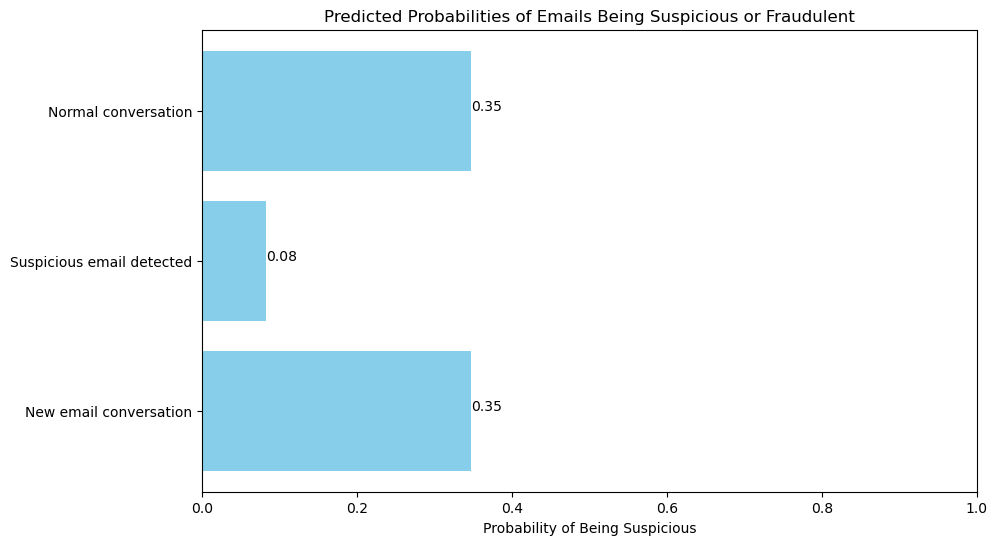

In [22]:
import matplotlib.pyplot as plt

def visualize_predictions(emails, probabilities):
    """
    Visualizes the predicted probabilities of emails being suspicious or fraudulent.

    Parameters:
    - emails: A list of email texts or subjects being analyzed.
    - probabilities: A list of probabilities corresponding to the likelihood of each email being suspicious.
    """
    # Ensure the lists have the same length
    assert len(emails) == len(probabilities), "Emails and probabilities lists must have the same length."

    # Creating the bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(emails, probabilities, color='skyblue')
    plt.xlabel('Probability of Being Suspicious')
    plt.title('Predicted Probabilities of Emails Being Suspicious or Fraudulent')
    for index, value in enumerate(probabilities):
        plt.text(value, index, f"{value:.2f}")
    plt.xlim(0, 1)  # Assuming probabilities range from 0 to 1
    plt.show()

# Example usage:
emails = ["New email conversation", "Suspicious email detected", "Normal conversation"]
probabilities = [0.34725702, 0.08264993, 0.34725702]
visualize_predictions(emails, probabilities)


In [67]:
def visualize_fraud_predictions(email_texts, predictions):
    """
    Visualize the emails with their predicted fraud probabilities.

    Parameters:
    - email_texts: List of email text content.
    - predictions: List of predicted probabilities corresponding to the fraud likelihood of each email.

    The function doesn't return anything but prints each email with its fraud prediction.
    """
    for email, probability in zip(email_texts, predictions):
        print("Email Content:\n", email)
        print("Fraud Likelihood: {:.2%}".format(probability))
        print("-" * 100)

# Example usage
email_texts = [
    "This is a new email conversation.",
    "Another suspicious email detected!",
    "Normal conversation."
]
predicted_probabilities = [0.34725702, 0.08264993, 0.34725702]

visualize_fraud_predictions(email_texts, predicted_probabilities)


Email Content:
 This is a new email conversation.
Fraud Likelihood: 34.73%
----------------------------------------------------------------------------------------------------
Email Content:
 Another suspicious email detected!
Fraud Likelihood: 8.26%
----------------------------------------------------------------------------------------------------
Email Content:
 Normal conversation.
Fraud Likelihood: 34.73%
----------------------------------------------------------------------------------------------------


In [31]:
def filter_emails_by_similarity_and_likelihood(emails, similarity_threshold=0.5, likelihood_threshold=8.0):
    """
    Filters emails based on content similarity to a given phrase and a likelihood threshold.
    
    Parameters:
    - emails: List of dictionaries, where each dictionary contains 'content' and 'likelihood' keys.
    - similarity_threshold: A threshold for determining content similarity (not used in this simple example).
    - likelihood_threshold: The minimum likelihood score for an email to be considered suspicious.
    
    Returns:
    - A list of emails considered suspicious based on the likelihood threshold.
    """
    suspicious_phrase = "Another suspicious email detected!"
    filtered_emails = [email for email in emails if suspicious_phrase in email['content'] and email['likelihood'] >= likelihood_threshold]
    return filtered_emails

# Example usage:
emails = [
    {'content': "This is a normal email content.", 'likelihood': 2.0},
    {'content': "Another suspicious email detected! Please check it out.", 'likelihood': 8.26},
    {'content': "Another suspicious email detected! This seems like a scam.", 'likelihood': 9.5},
    {'content': "This is another normal conversation.", 'likelihood': 3.2}
]

# Filtering emails:
suspicious_emails = filter_emails_by_similarity_and_likelihood(emails, likelihood_threshold=8.0)

# Displaying the filtered, suspicious emails:
for email in suspicious_emails:
    print(f"Email Content: {email['content']}")
    print(f"Fraud Likelihood: {email['likelihood']}%")
    print("-"*80)


Email Content: Another suspicious email detected! Please check it out.
Fraud Likelihood: 8.26%
--------------------------------------------------------------------------------
Email Content: Another suspicious email detected! This seems like a scam.
Fraud Likelihood: 9.5%
--------------------------------------------------------------------------------


In [65]:
import pandas as pd

def filter_emails_by_keywords(filename, keywords):
    # Load the dataset
    emails_df = pd.read_csv(filename, usecols=['message'])
    # Convert the keywords to lowercase
    keywords = [keyword.lower() for keyword in keywords]
    # Filter the emails
    filtered_emails = emails_df[emails_df['message'].str.lower().apply(lambda x: any(keyword in x for keyword in keywords))]
    return filtered_emails

# Example usage
filename = 'emails.csv'
keywords = ['dinheiro']
filtered_emails = filter_emails_by_keywords(filename, keywords)

# Safely attempt to sample from the filtered DataFrame
if len(filtered_emails) >= 100:
    print(filtered_emails.sample(100))
elif len(filtered_emails) > 0:
    print(filtered_emails.sample(len(filtered_emails)))  # Sample whatever number of rows are available
else:
    print("No emails match the specified keywords.")


                                                  message
454084  Message-ID: <122546.1075852493012.JavaMail.eva...
437156  Message-ID: <2082315.1075858737713.JavaMail.ev...
440097  Message-ID: <23506347.1075858699585.JavaMail.e...


In [66]:
import pandas as pd

# Load your dataset
emails_df = pd.read_csv('emails.csv')

# List of row indices you want to view, adjust these indices according to your needs
indices = [454084, 437156, 440097]  # Replace these with the indices you're interested in

# Iterate through the list of indices and print each corresponding message
for index in indices:
    print(f"Message at index {index}:")
    print(emails_df.loc[index, 'message'])
    print("-" * 100)  # Print a separator for readability


Message at index 454084:
Message-ID: <122546.1075852493012.JavaMail.evans@thyme>
Date: Fri, 26 Oct 2001 08:11:51 -0700 (PDT)
From: luiz.maurer@enron.com
To: jose.bestard@enron.com, richard.shapiro@enron.com
Subject: RE: FYI-Tracking Account for some non-controllable components
Cc: d..steffes@enron.com
Mime-Version: 1.0
Content-Type: text/plain; charset=ANSI_X3.4-1968
Content-Transfer-Encoding: 7bit
Bcc: d..steffes@enron.com
X-From: Maurer, Luiz </O=ENRON/OU=NA/CN=RECIPIENTS/CN=LMAURER>
X-To: Bestard, Jose </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Notesaddr/cn=4969d7ad-eda10c9e-86256a87-7af435>, Shapiro, Richard </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Rshapiro>
X-cc: Steffes, James D. </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Jsteffe>
X-bcc: 
X-Folder: \JSTEFFE (Non-Privileged)\Steffes, James D.\Deleted Items
X-Origin: Steffes-J
X-FileName: JSTEFFE (Non-Privileged).pst

A giant step.  Good reasons to celebrate.

I think there is already some evolution in terms of the mechanics - the government has itemized the 